# Linear Regression on Fish Data

The following data-set contains the number of fish groups of camper caught in a state park (taken from https://stats.idre.ucla.edu/r/dae/zip/). Your task here is to predict the number of fish caught by a fishing party from the following information: 

* how many people are in the group
* the number children in the group
* the use of live bait
* whether the group came with a camper to the park. 

We have a small data set, of 250 groups, which visited a state park and provided. For comparison the data set is already split into a training set and testset.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
# The Fish Data Set
# See example 2 from https://stats.idre.ucla.edu/r/dae/zip/ 
#"nofish","livebait","camper","persons","child","xb","zg","count"
import os
from urllib.request import urlretrieve
if not os.path.isfile('fishing.npz'):
    print("Downloading")
    urlretrieve('http://www-home.htwg-konstanz.de/~oduerr/data/fishing.npz',filename = 'fishing.npz')
d = np.load('fishing.npz')
Xt = d['Xt'] #"livebait","camper","persons","child"
Xte = d['Xte']
yt = d['yt']
yte = d['yte']
pd.DataFrame(Xt[0:2])

,0,1,2,3
0,1.0,0.0,4.0,0.0
1,1.0,1.0,2.0,0.0


a) Do a linear regression by creating a design matrix with the intercept term and use the fomulae given in the lecture to determine the coefficients on the training set.

In [3]:
Xt_new = np.concatenate((Xt.T, np.ones((1,200))))
print(Xt_new.shape)
Xt_new = Xt_new.T
print(Xt_new.shape)
Xte_new = np.concatenate((Xte.T, np.ones((1,50))))
print(Xte_new.shape)
Xte_new = Xte_new.T
print(Xte_new.shape)

(5, 200)
(200, 5)
(5, 50)
(50, 5)


In [4]:
Xt_new[0:3]

array([[1., 0., 4., 0., 1.],
       [1., 1., 2., 0., 1.],
       [1., 1., 3., 0., 1.]])

In [5]:
Xt = np.asmatrix(Xt_new)
Xte = np.asmatrix(Xte_new)
yt = np.asmatrix(yt).T
print(Xt[0:3])
Xt.shape, yt.shape

[[1. 0. 4. 0. 1.]
 [1. 1. 2. 0. 1.]
 [1. 1. 3. 0. 1.]]


((200, 5), (200, 1))

In [6]:
w = np.ones((5))
print(w)
d = np.matmul(Xt,w)
d[:,1:10]

[1. 1. 1. 1. 1.]


matrix([[5., 6., 8., 8., 3., 6., 5., 8., 6.]])

In [7]:
XTX = np.matmul(Xt.T,Xt)
XTXI = np.linalg.inv(XTX)
XTXIXT = np.matmul(XTXI, Xt.T)
w = np.matmul(XTXIXT,yt)
w

matrix([[ 2.4822138 ],
        [ 2.95430727],
        [ 4.64953914],
        [-5.47160051],
        [-8.49222821]])

In [8]:
np.mean(np.square((np.matmul(Xt,w).flatten() - yt.flatten()))) # The MSE

117.26947782687198

In [9]:
Xte.shape, w.shape
np.mean(np.square((np.matmul(Xte,w).flatten() - yte.flatten()))) # The MSE

73.75591483452075

73.75591483452075

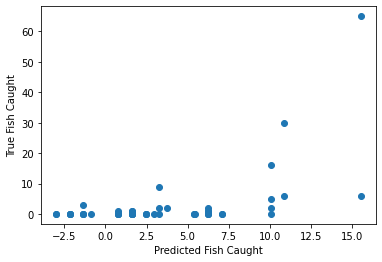

In [10]:
y_pred = np.matmul(Xte,w)
y_pred = np.squeeze(np.asarray(y_pred))

plt.scatter([y_pred], [yte])
plt.xlabel('Predicted Fish Caught')
plt.ylabel('True Fish Caught')


MSE = np.mean(np.square((y_pred.flatten() - yte.flatten()))) # The MSE
MSE

b) Repeat a) but this time with `LinearRegression` from `sklearn.linear_model`

In [11]:
from sklearn.linear_model import LinearRegression
model_skl = LinearRegression(fit_intercept=False) #We have an extended X
model_skl.fit(Xt,yt)
model_skl.coef_

array([[ 2.4822138 ,  2.95430727,  4.64953914, -5.47160051, -8.49222821]])

73.75591483452075

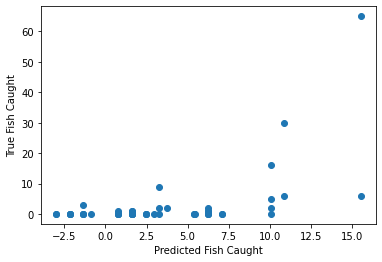

In [12]:
y_pred = np.matmul(Xte,model_skl.coef_.T)
plt.scatter([y_pred], [yte])
plt.xlabel('Predicted Fish Caught')
plt.ylabel('True Fish Caught')

np.mean(np.square((y_pred.flatten() - yte.flatten()))) # The MSE

Result: array([-8.49222821,  2.4822138 ,  2.95430727,  4.64953914, -5.47160051])
Don't forget the intercept, you should have 5 numbers!

c) Determine the Root Mean Square Error (RMSE) and the average negative log-likelihood (NLL) on the testset. For NLL we assume that the conditional probability distrubution (CPD) $p(y|x)$ is given by the density of a Gaussian with constant variance $\sigma^2$. Estimate $\sigma^2$ using the variance of the residuals. Use the variance estimation with $1/N$. 

Result: $ RMSE \approx 8.58812$, $\hat \sigma^2 \approx 73.7559$, $\tt{NLL} \approx 3.569$

In [33]:
print("RMSE:", np.sqrt(MSE))
#print("SIGMA^2:", np.mean((y_pred - yte)**2))
#print("SIGMA^2:", np.mean(np.square((y_pred - yte))))
print("SIGMA^2:", MSE)
print("NLL:",0.5*np.log(2 * np.pi * MSE) + 0.5*np.mean((yte - np.squeeze(np.asarray(y_pred)))**2)/MSE)



#var = mean(abs(x - x.mean())**2)


RMSE: 8.588126386734231
SIGMA^2: 73.75591483452075
NLL: 3.5693191297796893


d) For the testset: plot the predicted mean number of fish caught ($\mu$) against observed number of fish caught. Further include the 2.5 and 97.5 precentile of p(y|x), the conditional predictive distribution (CPD) of $y$ for a given $x$. Why is a Gaussian not ideal for that kind of data? 

Hint: For the Gaussian the 2.5% and the 97.5% percentile is approximatiy given by $\mu \pm 1.96*\sigma$

In [14]:
df = pd.DataFrame(data = y_pred, columns = ["y_pred"])

df.insert(loc = 1, column = "y_te", value = yte)

display(df.head())
display(df.describe(percentiles=[0.025, .25, .5, .75, 0.975]))

def percentile(mean, sigma):
    percentile_025 = mean - 1.96 * sigma
    percentile_975 = mean + 1.96 * sigma
    return percentile_025, percentile_975

y_pred_perc = percentile(3.584987, 4.624718)
y_te_perc = percentile(3.060000, 10.222845)

y_pred_perc, y_te_perc

,y_pred,y_te
0,5.456389,0.0
1,2.467002,0.0
2,10.105928,2.0
3,3.289064,2.0
4,-1.360475,0.0


,y_pred,y_te
count,50.000000,50.000000
mean,3.584987,3.060000
std,4.624718,10.222845
min,-3.004598,0.000000
2.5%,-2.819634,0.000000
25%,0.771771,0.000000
50%,2.467002,0.000000
75%,6.243371,1.000000
97.5%,14.496303,26.850000
max,15.542449,65.000000


((-5.47946028, 12.64943428), (-16.9767762, 23.096776199999997))

e) This data is count data. Count data has only positive values and also the distribution is discrete. You cannot catch 0.5 fish and that the CPD has probability density > 0 on negative number of fish is wrong too. A Gaussian as a CPD is therefore not ideal. 

Now use a Poissonian as CPD. If we assume a Poissonian then the probability to catch $k$ fish is given by 
$$
  p(k) = \exp(-\mu) \frac{\mu^k}{k!}
$$

and the NLL is thus by:

$$
 log(p(k)) = -\mu  + k \cdot \log(\mu) - log(k!)
$$

with $\mu$ being the expectation. In our case the average number of fish expected.

In the case of the probabilistic interpretation of the linear regression, $y_i$ for a given $x_i$ is distributed like a Gaussian. The paramter $\mu_i$ from $N(\mu_i,\sigma^2)$ has been determined from $x_i$ via $\mu_i= \beta^T \cdot x_i$ by minimizing the NLL. 

A small additional detail: For the Poissonian case, $\mu_i$ needs to be positive. We therefore do not use $\beta^T \cdot x_i$ directly but "pipe it through" an exponential first to make it positive and thus link $\mu_i=exp(\beta^T \cdot x_i)$ to the data.

Use a gradient descent approach on the NLL to find the solution for the parameters. Calculate the RMSE and the NLL on the test set and compare with c).

Hint: On the trainingset for the parameter values (1,1,1,1,1) the NLL should be approx 1508 and the gradient (1518.61, 1403.99, 1171.02, 5701.91, 3258.7). For the NLL a good learning rate would be 0.001 and training should be done for at least 5000 epochs.

In [15]:
def NLL(y_train, Xd, w):
    mu = np.exp(np.matmul(Xd,w))
    ret = np.zeros_like(mu)
    for i in range(ret.shape[0]):
        ret[i] = mu[i] - y_train[i]*np.log(mu[i]) + np.log(1.0*np.math.factorial(y_train[i]))
    return np.mean(ret)

w = np.ones(5)
yt_arr = np.squeeze(np.asarray(yt))
yt_arr = yt_arr.astype(int)
Xt_arr = np.squeeze(np.asarray(Xt))

NLL(yt_arr, Xt_arr, w)

1507.9856602262082

In [16]:
def gradNLL(y_train, Xd, w):
    mu = np.exp(np.matmul(Xd,w))
    #print(mu.shape)
    ret = np.zeros_like(Xd)
    for i in range(Xd.shape[0]):
        mux = Xd[i] * mu[i]
        ret[i] = -mux + y_train[i] *Xd[i]
    return np.mean(ret, axis=0)

NLL(yt_arr, Xt_arr,np.ones(5))
np.round(gradNLL(yt_arr, Xt_arr,np.ones(5)),2)

array([-1403.99, -1171.02, -5701.91, -3258.7 , -1518.61])

In [17]:
from tqdm import tqdm 
w = np.ones(5)
hist = []
for i in tqdm(range(10000)):
    if (i % 10 == 0):
        hist.append(NLL(yt_arr, Xt_arr,w))
    w = w + 0.001 * gradNLL(yt_arr, Xt_arr,w)
w, NLL(yt_arr, Xt_arr,w)

100%|██████████| 10000/10000 [00:15<00:00, 655.10it/s]


(array([ 0.56500613,  0.66091814,  0.93220074, -1.62023821, -1.74007527]),
 3.3806067025761606)

(0.0, 5.0)

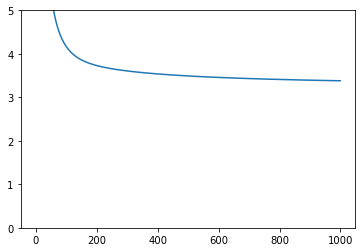

In [18]:
plt.plot(hist)
plt.ylim(0,5)

f) Do the same plot as in d) but this time with a Poisson CPD. Hint you can use scipy.stats.poisson to calculate the percentiles.